We have solved this problem already, but in a different way, here: 
https://grainofsandendlessbeach.blogspot.com/2024/08/polygon-obstacle-path-finder-chapter-3.html

This was back in the day where I did not realise that there are Markdown cells in a jupyter notebook: the joys of self-learning. Previously (link above) we created a graph by finding all vertices visible from a particular vertex, for all vertices. Once the graph was fully formed, we ran a few graph search algorithms to find a path from the start to the end. Obviously A-star and uniform-cost search (dijkstra) found the shortest path (the red and green lines). Here we are taking a different approach: We are asked in Exercise 4.11 to turn this problem into an environment problem. No longer do we form a graph by fully surveying the problem, then running an algorithm on the graph to obtain a solution. This time we are asked to provide an agent with percepts in the form of a collection of reachable vertices. The agent then makes a decision on what action to take: this comes in the form of a vector describing a straight-line path to follow.

One of the difficulties in this problem is that we have to take into account the size of the agent. For simplicity I am going to assume that the agent is circular. If this was not the case then it is a decent assumption to assume that the agent is bounded by a circular region.


If you want to run this code, look for `polygon_env`, here: 
https://github.com/hmp-anthony/AIMA

## My Idea!

My idea is to create a polygon class that takes a list of vertices. I will endow this class with a function that takes the size of the agent (its radius) and returns a list of spheres that represent possible targets for the agent to reach, for that particular polygon. This is quite a feat in computational geometry. 

An agent will beable to reach a target only if all three "visibility" rays emanating from the agent to the target are not breached by any line segment forming a boundary of the polygons. These three rays as defined as follows: the first is from the center of the agent to the center of the target. The other two are difficult to explain. Image?

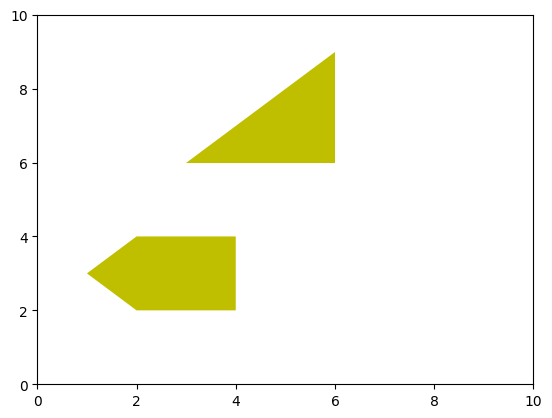

In [14]:
from search_2 import *
from matplotlib.patches import Polygon

class polygon:
    def __init__(self, vertices):
        self.vertices = vertices

    def get_vertices(self):
        return self.vertices

polygons = [polygon([(2,2), (4,2), (4,4), (2,4), (1,3)]),
            polygon([(3,6), (6,6), (6,9)])]

polygon_plot = []

for p in polygons:
    polygon_plot.append(Polygon(p.get_vertices(), facecolor = 'y'))

fig,ax = plt.subplots()

for p in polygon_plot:
    ax.add_patch(p)

ax.set_xlim([0,10])
ax.set_ylim([0,10])
plt.show()